# Optical Character Recognition (OCR)

## Install tesseract

In [ ]:
# Install tesseract engine
!apt-get install tesseract-ocr

# Install tesseract for spanish
!apt-get install tesseract-ocr-spa

# Install tesseract python library
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-spa
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 951 kB of archives.
After this operation, 2,309 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-spa all 1:4.00~git30-7274cfa-1.1 [951 kB]
Fetched 951 kB in 1s (888 kB/s)
Selecting previously unselected package tesseract-ocr-spa.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-spa_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-spa (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-spa 

## Testing Tesseract and OpenCV

In [ ]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO

# 1. Cargar una imagen desde una URL (o puedes subir una a Colab)
url = "https://tesseract.projectnaptha.com/img/eng_bw.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 2. Ejecutar OCR (especificando idioma si instalaste 'spa')
texto = pytesseract.image_to_string(img, lang='eng')

# 3. Mostrar el resultado
print("Texto extraído:")
print("-" * 20)
print(texto)


import cv2
print(f"Pytesseract Version: {pytesseract.__version__}")
print(f"Pillow Version: {Image.__version__}")
print(f"OpenCV Version: {cv2.__version__}")



Texto extraído:
--------------------
Mild Splendour of the various-vested Night!
Mother of wildly-working visions! hail!
I watch thy gliding, while with watery light
Thy weak eye glimmers through a fleecy veil;
And when thou lovest thy pale orb to shroud
Behind the gather’d blackness lost on high;
And when thou dartest from the wind-rent cloud
Thy placid lightning o’er the awaken’d sky.

Pytesseract Version: 0.3.13
Pillow Version: 11.3.0
OpenCV Version: 4.12.0


## 1. Extract Text

TEXTO EXTRAÍDO:
--------------------
Mild Splendour of the various-vested Nightl
Mother of wildly-working visions! haill
I watch thy gliding, while with watery light
Thy weak eye glimmers through a fleecy veil;
And when thou lovest thy pale orb to shroud
Behind the gather'd blackness lost on high;
And when thou dartest from the wind-rent cloud
Thy placid lightning 0'er the awaken'd sky.


Imagen procesada enviada al OCR:


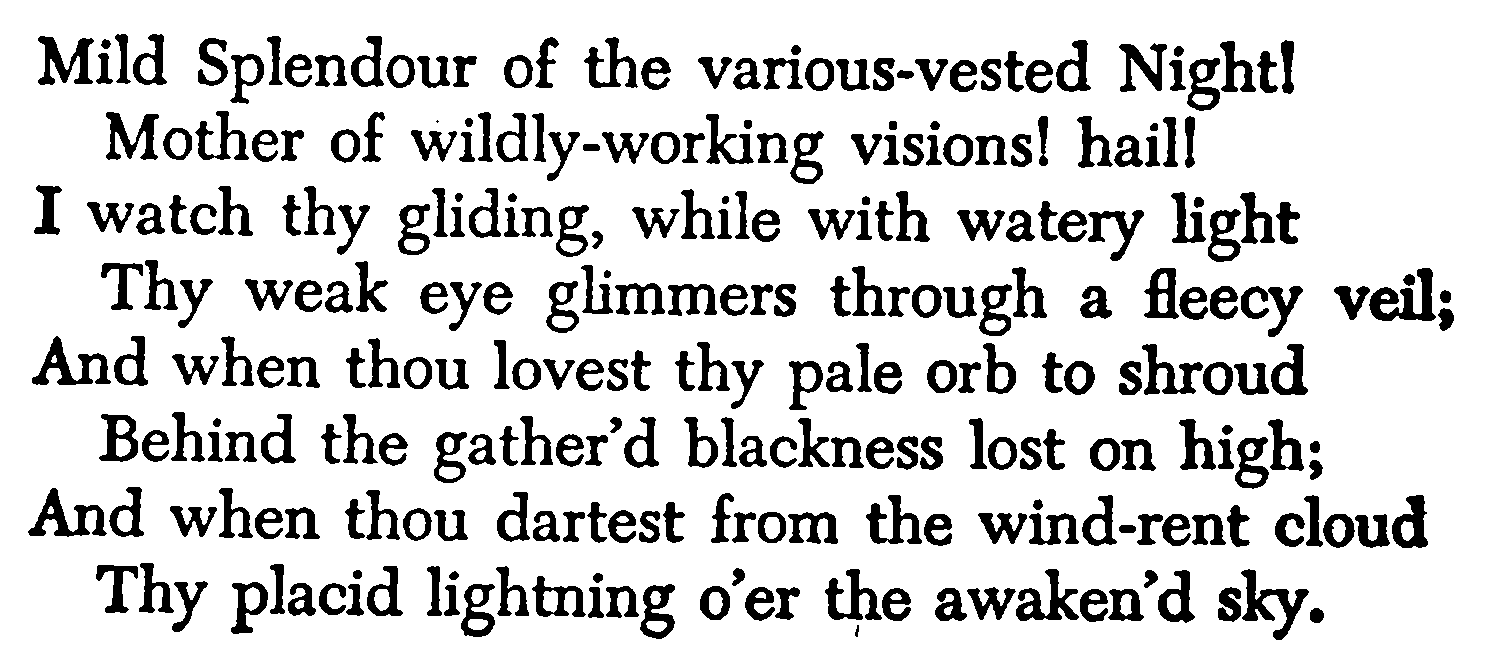

In [ ]:
import cv2
import pytesseract
from PIL import Image
from google.colab.patches import cv2_imshow # Necesario para ver imágenes en Colab

# 1. Cargar la imagen (Asegúrate de que la ruta sea correcta)
ruta = "/content/images/eng_bw.png"
image_to_ocr = cv2.imread(ruta)


# --- INICIO DEL PREPROCESAMIENTO ---

# Paso 1: Convertir a escala de grises
# El OCR no necesita color; el gris reduce la complejidad de la imagen.
preprocessed_img = cv2.cvtColor(image_to_ocr, cv2.COLOR_BGR2GRAY)


# Paso 2: Binarización y Umbralización de Otsu
# Convierte la imagen a blanco y negro puro. El método 'Otsu' calcula
# automáticamente el mejor umbral para separar el texto del fondo.
_, preprocessed_img = cv2.threshold(preprocessed_img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)


# Paso 3: Median Blur (Desenfoque de mediana)
# Elimina el "ruido" (puntos negros o salpicaduras) que podrían confundirse con letras.
preprocessed_img = cv2.medianBlur(preprocessed_img, 3)

# # --- FIN DEL PREPROCESAMIENTO ---

# Paso 4: Guardar y cargar como imagen PIL
# Tesseract en Python prefiere el formato de la librería Pillow (PIL).
cv2.imwrite("temp_img.jpg", preprocessed_img)
preprocessed_pil_img = Image.open('temp_img.jpg')

# 5. Ejecutar OCR
# Usamos 'spa' para español y psm 6 (asume un bloque de texto uniforme)
texto = pytesseract.image_to_string(preprocessed_pil_img, lang='spa', config='--psm 6')

# 6. Mostrar resultados
print("TEXTO EXTRAÍDO:")
print("-" * 20)
print(texto)

# Visualizar la imagen procesada para ver qué está leyendo la IA
print("\nImagen procesada enviada al OCR:")
cv2_imshow(preprocessed_img)

| Modelo | Capas con Peso | Tamaño (MB) | Parámetros | Fortalezas |
| :--- | :---: | :---: | :---: | :--- |
| **VGG16** | 16 | ~528 MB | 138M | Estructura simple y lineal; ideal para transferencia de aprendizaje básica. |
| **VGG19** | 19 | ~549 MB | 143M | Mayor profundidad que VGG16 para capturar detalles ligeramente más finos. |
| **ResNet50** | 50 | ~98 MB | 25.6M | Conexiones residuales que permiten gran profundidad sin desvanecimiento de gradiente. |
| **InceptionV3** | 48 | ~92 MB | 23.9M | Uso de módulos "Inception" para procesar múltiples escalas de filtros en paralelo. |
| **MobileNetV2** | 53 | ~14 MB | 3.5M | Optimizada para dispositivos móviles y hardware con recursos limitados. |
| **Xception** | 71 | ~88 MB | 22.9M | Evolución de Inception que utiliza convoluciones separables por profundidad. |


# 🧠 Compendio de Arquitecturas CNN: De VGG a Xception

Este documento resume las arquitecturas de redes neuronales convolucionales (CNN) más influyentes en el Deep Learning moderno. Sirve como guía rápida para identificar, comparar y seleccionar el modelo adecuado según el problema.

---

## 📊 Tabla Comparativa Rápida

| Modelo | Año | Parámetros (aprox) | Tamaño en Disco | Input Típico | Innovación Principal |
| :--- | :--- | :--- | :--- | :--- | :--- |
| **VGG16** | 2014 | 138 M | ~528 MB | $224 \times 224$ | Uso exclusivo de filtros $3 \times 3$ y profundidad. |
| **VGG19** | 2014 | 143 M | ~550 MB | $224 \times 224$ | Extensión de VGG16 con 3 capas extra para mayor abstracción. |
| **ResNet50** | 2015 | 25.6 M | ~98 MB | $224 \times 224$ | **Skip Connections** (Saltos) para evitar el desvanecimiento del gradiente. |
| **InceptionV3**| 2015 | 23.8 M | ~92 MB | **$299 \times 299$** | **Módulos Inception** (filtros paralelos) y factorización de convoluciones. |
| **Xception** | 2017 | 22.9 M | ~88 MB | $299 \times 299$ | **Depthwise Separable Convolutions** + Residual connections. |
| **MobileNetV2**| 2018 | **3.4 M** | **~14 MB** | $224 \times 224$ | **Inverted Residuals** y optimización extrema para móviles. |

---

## 🏗️ Detalles por Arquitectura

### 1. VGG16 (Visual Geometry Group - 16 Layers)
**"La Simplicidad Bruta"**

* **Identificación:** Arquitectura lineal y muy profunda. Se caracteriza por bloques repetitivos de convoluciones $3 \times 3$ seguidos de Max Pooling. Termina con capas densas masivas.
* **Clave Técnica:** Demostró que apilar filtros pequeños ($3 \times 3$) es mejor que usar filtros grandes únicos.
* **Pros:** Muy fácil de entender e implementar. Excelente extractor de características genéricas.
* **Contras:** Extremadamente pesada (138M params). Lenta de entrenar. Ocupa mucha VRAM.
* **Uso Ideal:** Educación, Transfer Learning básico y **Style Transfer** (Transferencia de Estilo artístico).

### 2. VGG19
**"El Hermano Mayor"**

* **Identificación:** Idéntica a VGG16 pero añade 3 capas convolucionales extra en los bloques finales (total 19 capas con peso).
* **Clave Técnica:** Busca mayor abstracción de características profundas.
* **Diferencia vs VGG16:** A menudo ofrece rendimientos decrecientes (la mejora en precisión no justifica el costo computacional extra).
* **Uso Ideal:** Específicamente en **Neural Style Transfer**, donde sus capas extra ayudan a separar mejor el "estilo" de la "forma".

### 3. ResNet50 (Residual Network)
**"El Estándar de la Industria"**

* **Identificación:** Introduce los "Bloques Residuales". La red aprende la función residual $F(x)$ y suma la entrada original $x$ al final del bloque ($F(x) + x$).
* **Clave Técnica:** **Skip Connections (Conexiones de Salto)**. Soluciona el problema del *Vanishing Gradient* (gradiente que desaparece), permitiendo entrenar redes de 50, 100 o 150 capas. Usa "Bottleneck Layers" ($1 \times 1 \rightarrow 3 \times 3 \rightarrow 1 \times 1$) para eficiencia.
* **Pros:** Equilibrio perfecto entre precisión y peso. Fácil de optimizar.
* **Uso Ideal:** Es el *backbone* (columna vertebral) por defecto para detección de objetos (YOLO, Faster R-CNN), segmentación y clasificación general.

### 4. InceptionV3
**"La Astucia y la Anchura"**

* **Identificación:** No es secuencial simple. Usa **Módulos Inception** donde varias convoluciones ($1 \times 1$, $3 \times 3$, $5 \times 5$) ocurren en paralelo y se concatenan.
* **Clave Técnica:** Factorización de filtros (cambia $n \times n$ por $1 \times n$ y $n \times 1$) para reducir costos.
* **Pros:** Muy eficiente en parámetros. Excelente para manejar objetos de **diferentes escalas** en la misma imagen.
* **Uso Ideal:** Imágenes médicas, análisis de texturas finas, clasificación "fina" (fine-grained). *Nota: Requiere input de $299 \times 299$.*

### 5. Xception (Extreme Inception)
**"La Evolución Perfeccionista"**

* **Identificación:** Lleva la idea de Inception al extremo usando **Depthwise Separable Convolutions** (separa correlaciones espaciales de las de canal) y añade las conexiones residuales de ResNet.
* **Clave Técnica:** Desacopla totalmente el mapeo de canales del mapeo espacial.
* **Pros:** Suele superar a InceptionV3 y ResNet50 en precisión con un número similar de parámetros. Más rápida de entrenar que Inception.
* **Uso Ideal:** Cuando buscas el máximo rendimiento (SOTA) sin restricciones extremas de hardware. Datasets nuevos y complejos.

### 6. MobileNetV2
**"La Eficiencia Móvil"**

* **Identificación:** Diseñada específicamente para dispositivos con pocos recursos (CPU/Batería).
* **Clave Técnica:**
    1.  **Depthwise Separable Convolutions:** Reduce drásticamente el cómputo.
    2.  **Inverted Residuals:** Conecta capas "estrechas" (con pocos canales) en lugar de capas anchas.
* **Pros:** Increíblemente ligera (~3.4M params) y rápida. Baja latencia.
* **Contras:** Menor precisión absoluta comparada con las redes grandes.
* **Uso Ideal:** Aplicaciones móviles (Android/iOS), TensorFlow.js (Web), Raspberry Pi, Drones, IoT.

---

## 🎯 Guía de Selección Rápida: ¿Cuál uso?

1.  **¿Vas a correrlo en un celular o navegador web?**
    * 👉 Usa **MobileNetV2**.
2.  **¿Necesitas un modelo base sólido para detección de objetos o uso general?**
    * 👉 Usa **ResNet50**.
3.  **¿Tu problema implica objetos de tamaños muy variables o texturas médicas?**
    * 👉 Usa **InceptionV3** o **Xception**.
4.  **¿Estás aprendiendo Deep Learning o haciendo "Style Transfer"?**
    * 👉 Usa **VGG16**.
5.  **¿Quieres la mejor precisión moderna con recursos razonables?**
    * 👉 Usa **Xception**.

## VGG16

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predicted object: [[('n01644373', 'tree_frog', np.float32(0.98456544)), ('n01644900', 'tailed_frog', np.float32(0.015009551)), ('n01641577', 'bullfrog', np.float32(0.00022886024)), ('n01693334', 'green_lizard', np.float32(0.00010454718)), ('n01682714', 'American_chameleon', np.float32(5.616426e-05))]]
Predicted object: tree_frog
Accuracy: 98.46%


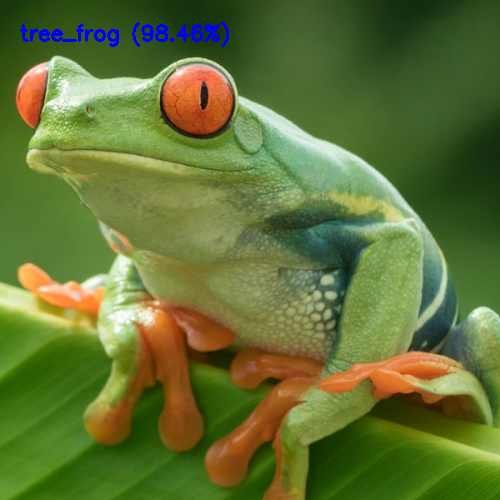

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import cv2
# Importante: Parche específico para visualización en Colab
from google.colab.patches import cv2_imshow

# 1. Descarga una imagen de prueba si no tienes una cargada
# !wget -O test_image.jpg https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg
img_path = "/content/images/test6.jpg" # Asegúrate de que el nombre coincida

# Cargar la imagen para procesamiento
img = load_img(img_path)
img = img.resize((224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = imagenet_utils.preprocess_input(img_array)

# Cargar el modelo VGG16
pretrained_model = VGG16(weights="imagenet")

# Realizar la predicción
prediction = pretrained_model.predict(img_array)
actual_prediction = imagenet_utils.decode_predictions(prediction)

print(f"Predicted object: {actual_prediction}")
print(f"Predicted object: {actual_prediction[0][0][1]}")
print(f"Accuracy: {actual_prediction[0][0][2]*100:.2f}%")

# 2. Ajuste para mostrar la imagen en Colab
disp_img = cv2.imread(img_path)
# Redimensionar la imagen de visualización para que el texto sea legible
disp_img = cv2.resize(disp_img, (500, 500))

text = f"{actual_prediction[0][0][1]} ({actual_prediction[0][0][2]*100:.2f}%)"
cv2.putText(disp_img, text, (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

# En lugar de cv2.imshow, usamos cv2_imshow
cv2_imshow(disp_img)

VGG19

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 868ms/step
[[('n02690373', 'airliner', np.float32(0.7075633)), ('n04266014', 'space_shuttle', np.float32(0.19511376)), ('n04592741', 'wing', np.float32(0.07701779)), ('n04552348', 'warplane', np.float32(0.01741179)), ('n04008634', 'projectile', np.float32(0.0010603771))]]
Predicted object is:
airliner
With accuracy:
70.76%


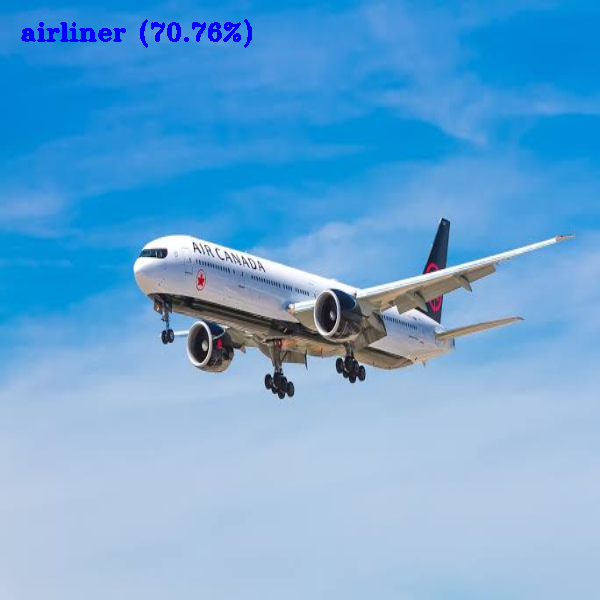

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import cv2
# Parche necesario para mostrar imágenes en Google Colab
from google.colab.patches import cv2_imshow

# --- PASO OPCIONAL: Descarga de imagen de prueba ---
# Si no tienes una imagen, descomenta la siguiente línea:
# !wget -O test_image.jpg https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg
img_path = '/content/images/test5.jpg'

# Cargar la imagen y redimensionar a 224x224
img = load_img(img_path)
img = img.resize((224, 224))

# Convertir a array y expandir dimensiones a 4D (batch, height, width, channels)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocesar la imagen según los requisitos de VGG19
img_array = imagenet_utils.preprocess_input(img_array)

# Cargar el modelo VGG19 (aprox. 548 MB)
pretrained_model = VGG19(weights="imagenet")

# Realizar la predicción
prediction = pretrained_model.predict(img_array)

# Decodificar los resultados
actual_prediction = imagenet_utils.decode_predictions(prediction)

print(actual_prediction)

print("Predicted object is:")
print(actual_prediction[0][0][1])
print("With accuracy:")
print(f"{actual_prediction[0][0][2]*100:.2f}%")

# --- Visualización en Colab ---
disp_img = cv2.imread(img_path)
# Ajustamos el tamaño para que se vea bien en el notebook
disp_img = cv2.resize(disp_img, (600, 600))

label = f"{actual_prediction[0][0][1]} ({actual_prediction[0][0][2]*100:.2f}%)"

# Dibujar el texto (ajusté el color a azul (255,0,0) para que sea legible sobre la imagen)
cv2.putText(disp_img, label, (20, 40), cv2.FONT_HERSHEY_TRIPLEX, 0.8, (255, 0, 0), 2)

# Mostrar la imagen (reemplaza a cv2.imshow)
cv2_imshow(disp_img)

ResNet50

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predicted object is:
fire_screen
With accuracy:
72.90%


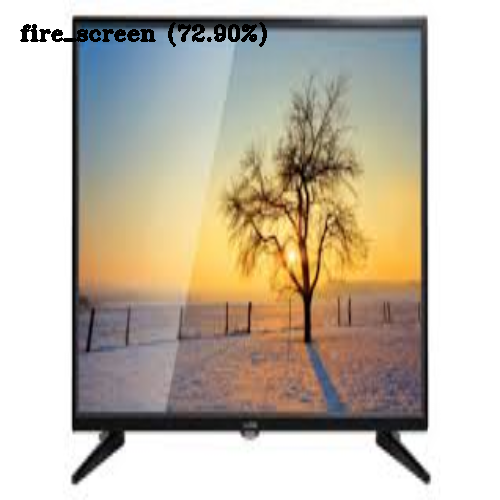

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np
import cv2
# Parche obligatorio para mostrar imágenes en Colab
from google.colab.patches import cv2_imshow

# 1. Configuración de la imagen
# Si no tienes la carpeta 'images/', puedes subir el archivo directamente
# o usar este comando para descargar una imagen de prueba:
# !wget -O test9.jpg https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg
img_path = '/content/images/test9.jpg'

# 2. Carga y preprocesamiento
img = load_img(img_path)
img = img.resize((224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocesamiento específico para ResNet50
img_array = imagenet_utils.preprocess_input(img_array)

# 3. Carga del modelo (Más ligero que VGG)
pretrained_model = ResNet50(weights="imagenet")

# 4. Predicción
prediction = pretrained_model.predict(img_array)
actual_prediction = imagenet_utils.decode_predictions(prediction)

print("Predicted object is:")
print(actual_prediction[0][0][1])
print("With accuracy:")
print(f"{actual_prediction[0][0][2]*100:.2f}%")

# 5. Visualización en el Notebook
disp_img = cv2.imread(img_path)
# Redimensionamos la salida para que sea clara en la pantalla
disp_img = cv2.resize(disp_img, (500, 500))

# Preparamos el texto del resultado
result_text = f"{actual_prediction[0][0][1]} ({actual_prediction[0][0][2]*100:.2f}%)"

# Dibujar el texto sobre la imagen (Color negro como en tu original: (0,0,0))
cv2.putText(disp_img, result_text, (20, 40),
            cv2.FONT_HERSHEY_TRIPLEX, 0.7, (0, 0, 0), 2)

# Reemplazo de cv2.imshow
cv2_imshow(disp_img)

Xception

91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted object is:
hen
With accuracy:
83.91%


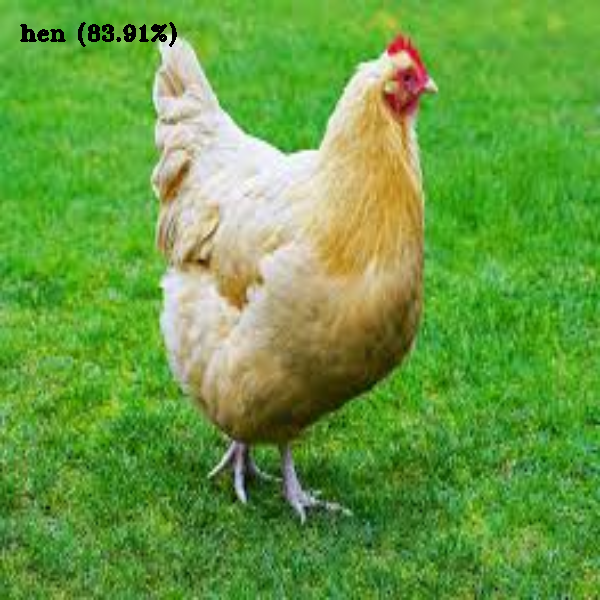

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception, imagenet_utils
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.xception import preprocess_input
import numpy as np
import cv2
# Parche necesario para visualizar imágenes en Google Colab
from google.colab.patches import cv2_imshow

# 1. Ruta de la imagen
# Asegúrate de subir tu imagen a Colab. Si no tienes una, usa:
# !wget -O test13.jpg https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg
img_path = '/content/images/test13.jpg'

# 2. Carga y preprocesamiento
# Xception utiliza por defecto un tamaño de 299x299
img = load_img(img_path)
img = img.resize((299, 299))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

# Preprocesamiento específico (escala los píxeles entre -1 y 1)
img_array = preprocess_input(img_array)

# 3. Carga del modelo (Aprox. 88 MB)
pretrained_model = Xception(weights="imagenet")

# 4. Predicción
prediction = pretrained_model.predict(img_array)
actual_prediction = imagenet_utils.decode_predictions(prediction)

print("Predicted object is:")
print(actual_prediction[0][0][1])
print("With accuracy:")
print(f"{actual_prediction[0][0][2]*100:.2f}%")

# 5. Visualización en Colab
disp_img = cv2.imread(img_path)
# Ajustamos el tamaño de visualización para que el texto sea legible
disp_img = cv2.resize(disp_img, (600, 600))

resultado = f"{actual_prediction[0][0][1]} ({actual_prediction[0][0][2]*100:.2f}%)"

# Dibujar el texto sobre la imagen
cv2.putText(disp_img, resultado, (20, 40),
            cv2.FONT_HERSHEY_TRIPLEX, 0.7, (0, 0, 0), 2)

# Mostrar la imagen (reemplaza a cv2.imshow)
cv2_imshow(disp_img)

SSD

predicted object 1: bottle: 75.47%


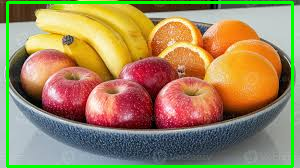

In [ ]:
import numpy as  np
import cv2
# Importar la función compatible con Colab
from google.colab.patches import cv2_imshow

# load the image to detect, get width, height
# resize to match input size, convert to blob to pass into model
img_to_detect = cv2.imread('/content/images/fruits.jpg')
img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]
resized_img_to_detect = cv2.resize(img_to_detect,(300,300))
img_blob = cv2.dnn.blobFromImage(resized_img_to_detect,0.007843,(300,300),127.5)
#recommended scale factor is 0.007843, width,height of blob is 300,300, mean of 255 is 127.5,

# set of 21 class labels in alphabetical order (background + rest of 20 classes)
class_labels = ["background", "aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable","dog", "horse", "motorbike", "person", "pottedplant", "sheep","sofa", "train", "tvmonitor"]

# Loading pretrained model from prototext and caffemodel files
# input preprocessed blob into model and pass through the model
# obtain the detection predictions by the model using forward() method
mobilenetssd = cv2.dnn.readNetFromCaffe('/content/models/mobilenetssd.prototext','/content/models/mobilenetssd.caffemodel')
mobilenetssd.setInput(img_blob)
obj_detections = mobilenetssd.forward()
# returned obj_detections[0, 0, index, 1] , 1 => will have the prediction class index
# 2 => will have confidence, 3 to 7 => will have the bounding box co-ordinates
no_of_detections = obj_detections.shape[2]

# loop over the detections
for index in np.arange(0, no_of_detections):
    prediction_confidence = obj_detections[0, 0, index, 2]
    # take only predictions with confidence more than 20%
    if prediction_confidence > 0.20:

        #get the predicted label
        predicted_class_index = int(obj_detections[0, 0, index, 1])
        predicted_class_label = class_labels[predicted_class_index]

        #obtain the bounding box co-oridnates for actual image from resized image size
        bounding_box = obj_detections[0, 0, index, 3:7] * np.array([img_width, img_height, img_width, img_height])
        (start_x_pt, start_y_pt, end_x_pt, end_y_pt) = bounding_box.astype("int")

        # print the prediction in console
        predicted_class_label = "{}: {:.2f}%".format(class_labels[predicted_class_index], prediction_confidence * 100)
        print("predicted object {}: {}".format(index+1, predicted_class_label))

        # draw rectangle and text in the image
        cv2.rectangle(img_to_detect, (start_x_pt, start_y_pt), (end_x_pt, end_y_pt), (0,255,0), 2)
        cv2.putText(img_to_detect, predicted_class_label, (start_x_pt, start_y_pt-5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)


# Usar cv2_imshow en lugar de cv2.imshow
cv2_imshow(img_to_detect)

## SSD Video

In [37]:
import os
import urllib.request
import cv2
import numpy as np
import base64
from IPython.display import display, Javascript, JSON
from google.colab.output import eval_js, register_callback
from google.colab import output

# --- 1. CONFIGURACIÓN Y DESCARGA DEL MODELO ---
proto_file = '/content/models/mobilenetssd.prototext'
model_file = '/content/models/mobilenetssd.caffemodel'

# URLs para descargar el modelo si no existe
proto_url = 'https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/MobileNetSSD_deploy.prototxt'
model_url = 'https://raw.githubusercontent.com/chuanqi305/MobileNet-SSD/master/MobileNetSSD_deploy.caffemodel'

# Crear directorio si no existe
if not os.path.exists('/content/models'):
    os.makedirs('/content/models')

if not os.path.exists(proto_file):
    print("Descargando arquitectura (prototxt)...")
    try:
        urllib.request.urlretrieve(proto_url, proto_file)
    except Exception as e:
        print(f"Error descargando prototxt: {e}")

if not os.path.exists(model_file):
    print("Descargando modelo entrenado (caffemodel)...")
    try:
        urllib.request.urlretrieve(model_url, model_file)
    except Exception as e:
        print(f"Error descargando caffemodel: {e}")

# Cargar la red neuronal
print("Cargando red neuronal SSD...")
try:
    net = cv2.dnn.readNetFromCaffe(proto_file, model_file)
except Exception as e:
    print(f"Error crítico cargando el modelo: {e}")

CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat","bottle", "bus", "car", "cat", "chair", "cow", "diningtable","dog", "horse", "motorbike", "person", "pottedplant", "sheep","sofa", "train", "tvmonitor"]

# --- 2. FUNCIÓN DE DETECCIÓN (PYTHON) ---
def detect_objects_frame(img_b64):
    # Verificar si el modelo se cargó
    if 'net' not in globals():
        return JSON([])

    try:
        # Decodificar imagen base64
        img_data = base64.b64decode(img_b64.split(',')[1])
        nparr = np.frombuffer(img_data, np.uint8)
        img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

        # --- VERIFICACIÓN DE TAMAÑO ---
        # MobileNet-SSD requiere estrictamente input de 300x300.
        # 1. Redimensionar la imagen original a 300x300 píxeles.
        resized = cv2.resize(img, (300, 300))

        # 2. Convertir a Blob. El argumento (300, 300) aquí confirma el tamaño para la red.
        blob = cv2.dnn.blobFromImage(resized, 0.007843, (300, 300), 127.5)

        net.setInput(blob)
        detections = net.forward()

        # Recuperar dimensiones originales para dibujar las cajas correctamente
        (h, w) = img.shape[:2]

        results = []
        for i in range(detections.shape[2]):
            confidence = detections[0, 0, i, 2]
            if confidence > 0.20:
                idx = int(detections[0, 0, i, 1])
                label = CLASSES[idx]

                # Coordenadas de la caja (escaladas a la imagen original)
                box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
                (startX, startY, endX, endY) = box.astype("int")

                results.append([
                    int(startX), int(startY),
                    int(endX - startX), int(endY - startY),
                    label, float(confidence)
                ])

        return JSON(results)
    except Exception as e:
        return JSON([])

# Registrar callback
register_callback('notebook.detect_objects_ssd_v2', detect_objects_frame)

# --- 3. JAVASCRIPT PARA WEBCAM Y VISUALIZACIÓN ---
def start_webcam_ssd(delay_ms=200):
  # Insertamos la variable delay_ms en el código JS usando f-string
  js = Javascript(f'''
    async function startWebcam() {{
      const delay = {delay_ms};

      const div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '640px';

      const video = document.createElement('video');
      video.style.display = 'none';
      video.width = 640;
      video.height = 480;

      const stream = await navigator.mediaDevices.getUserMedia({{video: true}});
      video.srcObject = stream;
      await video.play();

      // Canvas para mostrar video + cajas
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;

      const btn = document.createElement('button');
      btn.textContent = "🛑 DETENER DETECCIÓN (o presiona 'q')";
      btn.style.marginTop = "10px";
      btn.style.padding = "10px";
      btn.style.backgroundColor = "red";
      btn.style.color = "white";
      btn.style.border = "none";
      btn.style.cursor = "pointer";

      div.appendChild(canvas);
      div.appendChild(btn);
      document.body.appendChild(div);

      const ctx = canvas.getContext('2d');
      let stop = false;

      btn.onclick = () => {{ stop = true; }};
      document.addEventListener('keydown', (e) => {{
        if (e.key === 'q' || e.key === '1') {{ stop = true; }}
      }});

      // Loop de procesamiento
      while (!stop) {{
        // 1. Dibujar video en canvas
        ctx.drawImage(video, 0, 0);

        // 2. Obtener imagen pequeña para enviar (más rápido)
        let imgData = canvas.toDataURL('image/jpeg', 0.5);

        // 3. Invocar Python
        const result = await google.colab.kernel.invokeFunction(
          'notebook.detect_objects_ssd_v2', [imgData], {{}});

        const detections = result.data['application/json'];

        // 4. Dibujar cajas
        ctx.font = '18px Arial';
        ctx.lineWidth = 2;

        for (let i = 0; i < detections.length; i++) {{
            const [x, y, w, h, label, conf] = detections[i];

            ctx.strokeStyle = '#00FF00';
            ctx.strokeRect(x, y, w, h);

            ctx.fillStyle = '#00FF00';
            ctx.fillText(label + " " + Math.round(conf*100) + "%", x, y - 5);
        }}

        // 5. Retraso configurable (Sleep)
        if (delay > 0) {{
            await new Promise(r => setTimeout(r, delay));
        }}
      }}

      stream.getVideoTracks()[0].stop();
      div.remove();
    }}
    startWebcam();
  ''')
  display(js)

# Iniciar con un retraso de 200ms (ajustable)
start_webcam_ssd(delay_ms=200)

Cargando red neuronal SSD...


<IPython.core.display.Javascript object>